In [1]:
import pandas as pd
import csv
import requests
import seaborn as sns
import matplotlib as plt

In [2]:
def get_pokemon_data(poke_id):
  response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{poke_id}')
  pokemon_data = response.json()
  return pokemon_data

def get_pokemon_generation(pokemon_data):
  generations = {
    1: range(1, 152),
    2: range(152, 303),
    3: range(303, 438),
    4: range(438, 545),
    5: range(545, 701),
    6: range(701, 773),
    7: range(773, 859),
    8: range(859, 955),
    9: range(955, 1076),
  }
  for generation, pokemon_ids in generations.items():
    if pokemon_data["id"] in pokemon_ids:
      return generation
  raise ValueError("Unknown Pokemon generation.")

def get_pokemon_ability_1(payload):
    x = []
    for i in payload["abilities"]:
        x.append(i["ability"])
    return x[0]["name"]

def get_pokemon_ability_2(payload):
    x = []
    y = []
    for i in payload["abilities"]:
        x.append(i["ability"])
        y.append(i["slot"])
    if 2 in y:
        return x[1]["name"]
    else:
        return "NaN"
    
def get_pokemon_ability_hidden(payload):
    x = []
    y = []
    for i in payload["abilities"]:
        x.append(i["ability"])
        y.append(i["slot"])
    if 3 in y:
        return x[-1]["name"]
    else:
        return "NaN"
    
def get_pokemon_type_1(payload):
    x = []
    for i in payload["types"]:
        x.append(i["type"])
    return x[0]["name"]

def get_pokemon_type_2(payload):
    x = []
    y = []
    for i in payload["types"]:
        x.append(i["type"])
    if x[-1] == x[0]:
        return "NaN"
    return x[-1]["name"]

def create_csv_file(pokemon_data_list):
  with open("pokemon.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["ID", "Name", "HP", "Attack", "Special_Attack", "Defence", "Special_Defence", "Speed", "Generation", "Type1", "Type2", "Ability 1", "Ability 2", "Hidden Ability"])
    for pokemon_data in pokemon_data_list:
      pokedex_id = pokemon_data["id"]
      name = pokemon_data["name"]
      hp = pokemon_data["stats"][0]["base_stat"]
      attack = pokemon_data["stats"][1]["base_stat"]
      special_attack = pokemon_data["stats"][2]["base_stat"]
      defense = pokemon_data["stats"][3]["base_stat"]
      special_defense = pokemon_data["stats"][4]["base_stat"]
      speed = pokemon_data["stats"][5]["base_stat"]
      generation = get_pokemon_generation(pokemon_data)
      ability1 = get_pokemon_ability_1(pokemon_data)
      ability2 = get_pokemon_ability_2(pokemon_data)
      type1 = get_pokemon_type_1(pokemon_data)
      type2 = get_pokemon_type_2(pokemon_data)
      abilityhidden = get_pokemon_ability_hidden(pokemon_data)
      writer.writerow([pokedex_id, name, hp, attack, special_attack, defense, special_defense, speed, generation, type1, type2, ability1, ability2, abilityhidden])

def main():
  pokemon_data_list = []
  for pokemon_id in range(1, 906):
    pokemon_data = get_pokemon_data(pokemon_id)
    pokemon_data_list.append(pokemon_data)

  create_csv_file(pokemon_data_list)

if __name__ == "__main__":
  main()

In [3]:
df = pd.read_csv("pokemon.csv")

In [4]:
def strongest_pokemon_offence(type):
    filtered_df = df[(df["Type1"] == type) | (df["Type2"] == type)]
    filtered_df = filtered_df.assign(
        Preferred_Attack = filtered_df[['Attack', 'Special_Attack']].max(axis=1)
    )
    offence_filter = filtered_df.query("Preferred_Attack >= 110 and Speed >=100")
    ax = sns.scatterplot(data = offence_filter, x="Speed", y="Preferred_Attack", hue="Name")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

def strongest_pokemon_defence(type):
    filtered_df = df[(df["Type1"] == type) | (df["Type2"] == type)]
    defence_filter = filtered_df.query("Defence >= 110 and Special_Defence >= 110")
    ax = sns.scatterplot(data = defence_filter, x="Defence", y="Special_Defence", hue="Name")
    plt.rcParams["figure.figsize"] = (600, 400)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

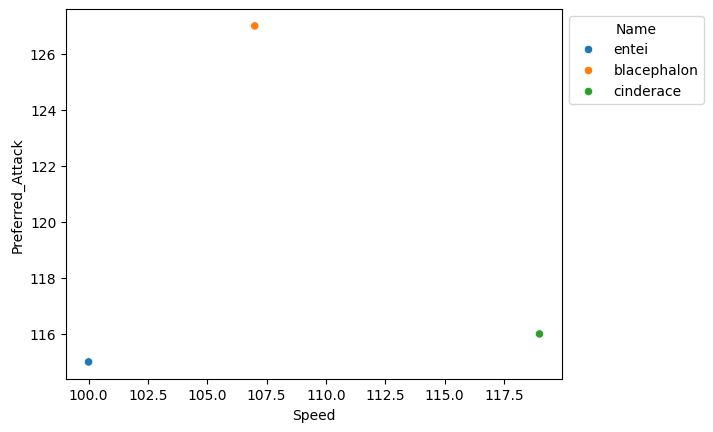

In [5]:
strongest_pokemon_offence("water")

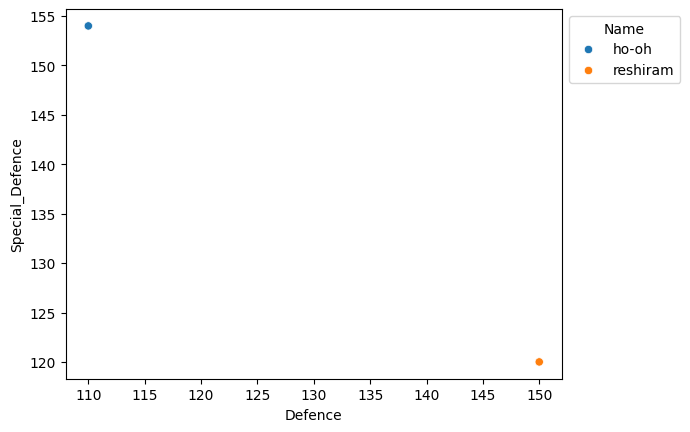

In [7]:
strongest_pokemon_defence("fire")